# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

[Подготовка данных](#preproc)<br>
[Подготовка данных: Выводы](#preproc_result)<br>
[Анализ данных](#analys)<br>
[Анализ данных: Выводы](#analys_result)<br>
[Модель](#model)<br>
[Модель: Выводы](#model_result)<br>
[Общие выводы](#result)

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, fbeta_score, make_scorer
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<a id='preproc'></a>
# 1. Подготовка данных

Для начала считываю данные и задаю дату как индекс

In [2]:
df = pd.read_csv("/datasets/gold_recovery_full.csv", index_col="date")
df_train = pd.read_csv("/datasets/gold_recovery_train.csv", index_col="date")
df_test = pd.read_csv("/datasets/gold_recovery_test.csv", index_col="date")

После открываю один из наборов и смотрю, как выглядят эти данные

In [3]:
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_cleaner.i

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_cleaner.i

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                         584

Как видно из информации по датасетам, пропуски есть во всех датасетах, даже в исходном, от чего нужно будет избавиться в дальнейшем

Для расчета параметра recovery надо найти минимальное и максимальное значение показателя для заполнения пропусков при расчете этого параметра

In [7]:
df_train['rougher.output.recovery'].max()

100.0

In [8]:
df_train['rougher.output.recovery'].min()

0.0

Ниже описана функция, которая на вход принимает:
- С — доля золота в концентрате после флотации/очистки,
- F — доля золота в сырье/концентрате до флотации/очистки,
- T — доля золота в отвальных хвостах после флотации/очистки,

а на выходе дает значение эффективности обогащения

In [9]:
def recovery(C, F, T): 
    rec = ((C*(F-T)) / (F*(C-T))) * 100
    rec[rec<0] = np.nan
    rec[rec>100] = np.nan
    return rec 

Далее необходимо расчитать этот параметр на тех данных, которые  нас есть и сравнить с теми данными, которые даны нам изначально

In [10]:
t,f,c = df_train['rougher.output.tail_au'], df_train['rougher.input.feed_au'], df_train['rougher.output.concentrate_au']
rec = recovery(c, f, t)

In [11]:
rec.isna().sum()

2573

In [12]:
#rec.isna().sum()
rec.fillna(value=0).describe()

count    16860.000000
mean        69.820045
std         32.727816
min          0.000000
25%         73.913137
50%         83.405512
75%         89.343361
max        100.000000
dtype: float64

В итоге не совпало 2573 значения из 16860, что весьма не плохо, далее необходимо расчитать MAE

In [13]:
tmp = df_train['rougher.output.recovery'].fillna(value=0)
tmp1 = rec.fillna(value=0)

In [14]:
tmp1.max()

100.0

In [15]:
 mean_absolute_error(tmp, tmp1)

8.00350954615662e-15

Значение МАЕ оказалась весьма мала, что говорит нам о том, что параметр recovеry рассчитан верно

Следующим этапом предобработки является сравнение обучающей и тестовой выборки на различающиеся столбцы

In [16]:
df_train.columns.symmetric_difference(df_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Как можно заметить, в тестовой выборке отсутствуют данные таких этапов и процессов, как:
- параметры продукта и расчетные значения чернового этапа (флотации)
- параметры продукта двух очисток и финальные характеристики

Это, на мой взгляд, обусловено теем, что на момент получения данных и оценки сырья значения этих параметров отсутствуют, а наша задача заключается как раз таки в оценке этого сырья для последующей обработки

Для начала я заполню пропуски предидущем значением в каждом столбце, так как в поставленной задаче есть пояснение, что чтоящие рядом записи похожи

In [17]:
df.dropna(subset=['rougher.output.recovery'], inplace=True)
df.dropna(subset=['final.output.recovery'], inplace=True)

In [18]:
df.fillna(method='ffill', inplace=True)

Для начала удаляю все дублирующиеся строки из основной таблицы
После чего на основе индексов из обучающей и тестовой таблицы я выберу все значения из основной таблицы данных

In [19]:
df.duplicated().sum()

0

In [20]:
df.drop_duplicates(inplace=True)

После этого надо разбить данные на X и Y, на основе которых будут обучаться две модели (так как надо предсказать значение двух параметров:), а так же получить тестовые выборки

<a id='preproc_result'></a>
### Вывод
1. Произведен расчет параметра recovery
2. Найдена МАЕ, которая оказалась мала, а значит что этот параметр расчитан верно в исходном наборе данных
3. Произведена предобработка данных (заполнены пропуски, удалены дубли)
4. Данные разбиты на два тех.процесса (флотация и очистка), получены данные для обучения и выделены целевые признаки

<a id='analys'></a>
# 2. Анализ данных

Для начала перечисляю все этапы, подходящие условию, а так же все металлы, которые перечислены в задании

In [21]:
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

metals = ['au', 'ag', 'pb']

После чего строю графики, которые отображают значение содержания металлов на этапах очистки от исходного сырья до конечного продукта

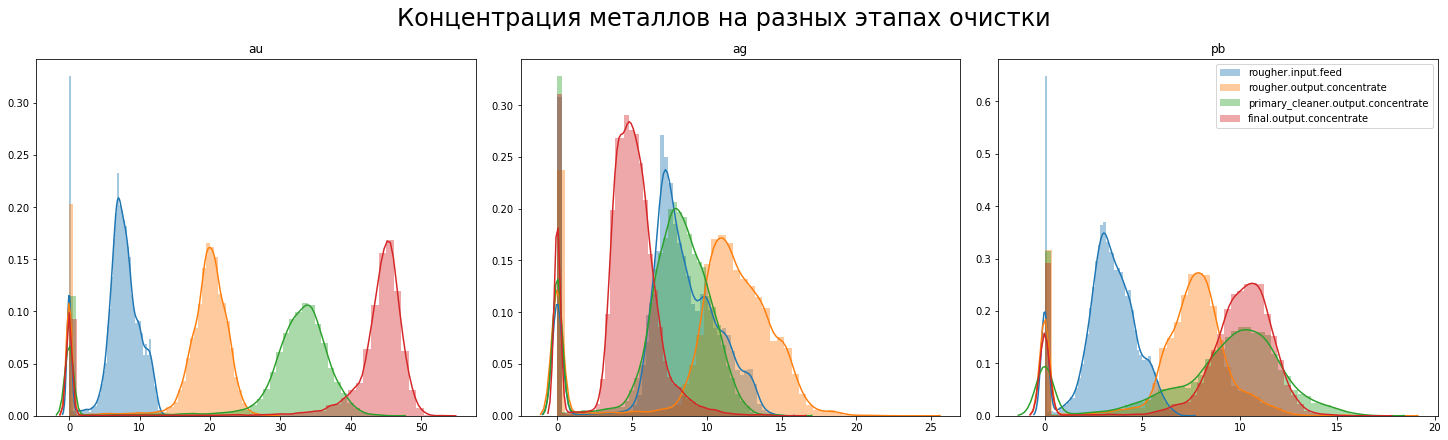

In [22]:
fig, axs = plt.subplots(1, len(metals), figsize=(20, 6), constrained_layout=True)
fig.suptitle('Концентрация металлов на разных этапах очистки', fontsize=24)

for metal, ax in zip(metals, axs):
    ax.set_title(metal)
    for proc in process:        
        cols = df_train.columns.str.contains(proc+'_'+metal)
        sns_ax = sns.distplot(df_train.loc[:, cols].dropna(), label=proc, ax=ax)    
plt.legend()
plt.show()

Как можно заметить, в изначальном сырье содержание серебра и золота примерно одинаковое, содержание свинца меньше, после всех этапов очистки содержание серебра и свинца заметно снижается по сравнению с содержанием золота

Золото:
    - после каждого этапа очистки концентрация металла в сырье увеличивается
Серебро:
    - изначально серебро имеет меньшую концентрацию, на этапе окончания флотации его концентрация повышается, а после его концентрация постепенно снижается
Свинец:
    - ситуация такая же, как и с серебром, но его концентрация меньше

После этого необходимо оценить распределние размеров гранул сырья на обучающей и тестовой выборке

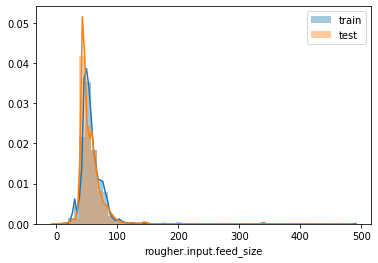

In [23]:
sns.distplot(df_train['rougher.input.feed_size'].dropna(), label='train')
sns.distplot(df_test['rougher.input.feed_size'].dropna(), label='test')
plt.legend()
plt.show()

Значения размеров гранул примерно равны, что позволяет понять о качественно разбитых данных

In [24]:
# sns.distplot(X_train_rougher['rougher.input.feed_size'], label='train')
# sns.distplot(X_test_rougher['rougher.input.feed_size'], label='test')
# plt.legend()
# plt.show()

Далее необходимо оценить концентрацию всех веществ на разных стадиях. Для этого снова строю диаграмму распределния

In [25]:
def drop_anomaly(proc_name, table):
    features_input_concentrate = [
        proc_name+'_au',
        proc_name+'_ag',
        proc_name+'_pb',
        proc_name+'_sol',
    ]
    
    table = table[table[features_input_concentrate].sum(1) > 1]
    return table

Для того, чтобы избежать перезаписи данных, я использую вышеописаную функцию для удаления аномалий (суммарная концентрация веществ не должна равняться 0) и сохраню резултат ее работы в другие переменные, и потом удалю эти выбросы в таблице, используемой для обучения

In [26]:
df_train_tmp = drop_anomaly('rougher.input.feed', df_train)
df_train_tmp = drop_anomaly('rougher.output.concentrate', df_train_tmp)
df_train_tmp = drop_anomaly('primary_cleaner.output.concentrate', df_train_tmp)
df_train_tmp = drop_anomaly('final.output.concentrate', df_train_tmp)

In [27]:
df_test_tmp = drop_anomaly('rougher.input.feed', df_test)

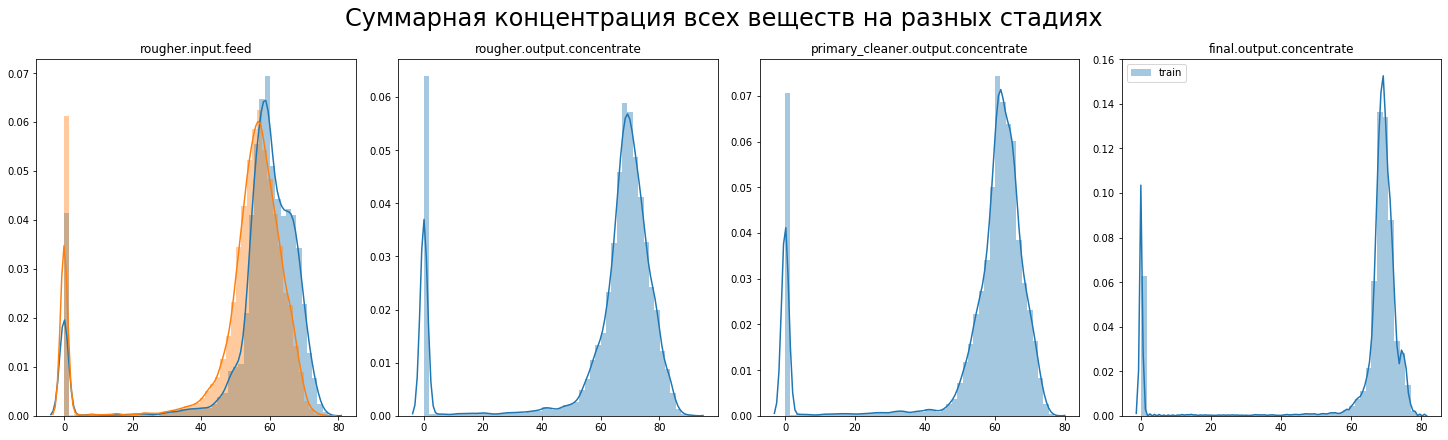

In [28]:
fig, axs = plt.subplots(1, len(process), figsize=(20, 6), constrained_layout=True)
fig.suptitle('Суммарная концентрация всех веществ на разных стадиях', fontsize=24)

for stage, ax in zip(process, axs):
    ax.set_title(stage)
    sum_train = df_train[stage+ '_ag'] + df_train[stage+ '_au'] + df_train[stage+ '_pb'] + df_train[stage+ '_sol']
    try:
        sum_test = df_test[stage+ '_ag'] + df_test[stage+ '_au'] + df_test[stage+ '_pb'] + df_test[stage+ '_sol']
        sns.distplot(sum_test.dropna(), label='test', ax=ax)
    except KeyError:
        pass
    sns.distplot(sum_train.dropna(), label='train', ax=ax) 

plt.legend()
plt.show()

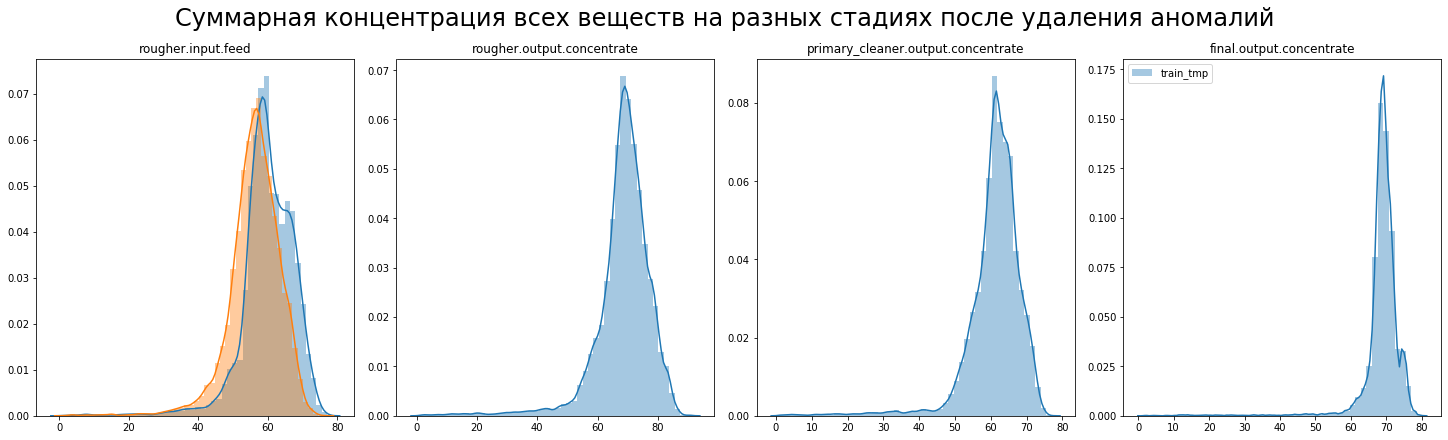

In [29]:
fig, axs = plt.subplots(1, len(process), figsize=(20, 6), constrained_layout=True)
fig.suptitle('Суммарная концентрация всех веществ на разных стадиях после удаления аномалий', fontsize=24)

for stage, ax in zip(process, axs):
    ax.set_title(stage)
    sum_train_tmp = df_train_tmp[stage+ '_ag'] + df_train_tmp[stage+ '_au'] + df_train_tmp[stage+ '_pb'] + df_train_tmp[stage+ '_sol']
    try:
        sum_test_tmp = df_test_tmp[stage+ '_ag'] + df_test_tmp[stage+ '_au'] + df_test_tmp[stage+ '_pb'] + df_test_tmp[stage+ '_sol']
        sns.distplot(sum_test_tmp.dropna(), label='test_tmp', ax=ax)
    except KeyError:
        pass
    sns.distplot(sum_train_tmp.dropna(), label='train_tmp', ax=ax) 

plt.legend()
plt.show()

Как можно заметить, информация о конценрации веществ на тесте присутствует только на входном сырье, далее эта информация отсутствует. По обучающей выборке можно отметить постепенное повышение концентрации веществ 

После удаления аномалий данные можно использовать для обучения моделей. Оставшиеся небольшийе выбросы около нуля - это сырье с  очен низкой суммарной концентрацией металлов

In [30]:
df_train = drop_anomaly('rougher.input.feed', df_train)
df_train = drop_anomaly('rougher.output.concentrate', df_train)

In [31]:
df_train = drop_anomaly('primary_cleaner.output.concentrate', df_train)
df_train = drop_anomaly('final.output.concentrate', df_train)

In [32]:
df_test = drop_anomaly('rougher.input.feed', df_test)

In [33]:
train = df.loc[df_train.index, df_train.columns]
test = df.loc[df_test.index, df_test.columns]

После необходимо почистить таблицу с обучающими данными, а именно удалить все столбцы, которые отсутствют в тестовой выборке

In [34]:
X_train = train[test.columns]

In [35]:
df_test.columns.symmetric_difference(X_train.columns)

Index([], dtype='object')

In [36]:
rougher_cols = X_train.columns.str.contains('rougher')
X_train_rougher = X_train.loc[:, rougher_cols].dropna()
y_train_rougher = df['rougher.output.recovery'].loc[X_train_rougher.index]
# X_train_rougher, X_val_rougher, y_train_rougher, y_val_rougher = train_test_split(X_train_rougher, y_train_rougher, test_size=0.2, random_state=12345)
X_test_rougher = test.loc[:, rougher_cols].dropna()
y_test_rougher = df['rougher.output.recovery'].loc[X_test_rougher.index]

In [37]:
final_cols = X_train.columns.str.contains('cleaner|final')
X_train_final = X_train.loc[:, final_cols].dropna()
y_train_final = df['final.output.recovery'].loc[X_train_final.index]
#X_train_cleaner, X_val_cleaner = train_test_split(X_train_cleaner, test_size=0.2, random_state=12345)
X_test_final = test.loc[:, final_cols].dropna()
y_test_final = df['final.output.recovery'].loc[X_test_final.index]

<a id='analys_result'></a>
### Вывод
1. В изначальном сырье содержание серебра и золота примерно одинаковое, содержание свинца меньше, 
2. После всех этапов очистки содержание серебра и свинца заметно снижается по сравнению с содержанием золота
3. Значения размеров гранул примерно равны, что позволяет понять о качественно разбитых данных
4. Информация о конценрации веществ на тесте присутствует только на входном сырье
5. По обучающей выборке можно отметить постепенное повышение концентрации веществ

<a id='model'></a>
# 3. Модель

Для начала необходимо написать функцию, расчитывающую sMAPE

In [38]:
def sMAPE_rougher(y, pred):
    y = y['rougher.output.recovery'].values
    return (np.nansum((np.abs(y - pred) * 2 * 100)/((np.abs(y) + np.abs(pred))))) / y.shape[0]

In [39]:
def sMAPE_final(y, pred):
    y = y['final.output.recovery'].values
    return (np.nansum((np.abs(y - pred) * 2 * 100)/((np.abs(y) + np.abs(pred))))) / y.shape[0]

In [40]:
# reg = LinearRegression().fit(X_train_rougher, y_train_rougher)
# reg_pred = reg.predict(X_test_rougher)
# reg_pred_mean = reg_pred.mean()
# rmse = mean_squared_error(y_test_rougher, reg_pred) ** 0.5
# print("Среднее значение по предикту:", reg_pred_mean)
# print("RMSE:", rmse)

In [41]:
# reg = LinearRegression().fit(X_train_final, y_train_final)
# reg_pred = reg.predict(X_test_final)
# reg_pred_mean = reg_pred.mean()
# rmse = mean_squared_error(y_test_final, reg_pred) ** 0.5
# print("Среднее значение по предикту:", reg_pred_mean)
# print("RMSE:", rmse)

In [42]:
#sMAPE_loss = make_scorer(sMAPE, greater_is_better=False)

Далее начинается процесс построения модели. Были выбраны такие модели регрессии как Lasso, Ridge и SGDRegressor. Создан пайплайн со скейлером и регрессором, после чего расчитывалось значение sMAPE

In [43]:
y_train_rougher = y_train_rougher.to_frame()

In [44]:
%%time
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('regr', Lasso())
])

param_grid = [
    {
        'regr': [Lasso(), Ridge()],
        'regr__alpha': np.logspace(-4, 1, 6),
    },
    {
        'regr': [SGDRegressor()],
        'regr__alpha': np.logspace(-5, 0, 6),
        'regr__max_iter': [500, 1000],
    },
]

grid = GridSearchCV(pipe, param_grid=param_grid, scoring=make_scorer(sMAPE_rougher, greater_is_better=False),  cv=3, n_jobs=-1, verbose=2)

grid.fit(X_train_rougher, y_train_rougher)
predicted_r = grid.predict(X_test_rougher)
# predicted = grid.predict(X_test_rougher)     
# print(predicted)
# print(y_test_rougher)
# print('Score:\t{}'.format(sMAPE(y_test_rougher['rougher.output.recovery'], predicted)))
#grid.score(X_test_rougher, y_test_rougher)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] regr=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regr=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001, total=   0.5s
[CV] regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001, total=   1.7s
[CV] regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001 
[CV]  regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001, total=   0.8s
[CV] regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.001 
[CV]  regr=Lasso(alpha=0.0001, copy_X=True, fit

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   28.2s finished


CPU times: user 16.3 s, sys: 11.9 s, total: 28.2 s
Wall time: 28.4 s


In [45]:
grid.best_score_

-7.82027373309378

In [46]:
grid.best_params_

{'regr': SGDRegressor(alpha=1.0, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False),
 'regr__alpha': 1.0,
 'regr__max_iter': 1000}

In [47]:
y_test_rougher = y_test_rougher.to_frame()

In [48]:
smape_r = sMAPE_rougher(y_test_rougher, predicted_r)
smape_r_const = sMAPE_rougher(y_test_rougher, pd.Series(y_test_rougher['rougher.output.recovery'].mean(), index=y_test_rougher.index))

In [49]:
print('Среднее значение на предсказании:\t{}'.format(predicted_r.mean()))
print('Среднее значение на константной модели:\t{}'.format(y_train_rougher['rougher.output.recovery'].mean()))
print('sMAPE:\t{}'.format(sMAPE_rougher(y_test_rougher, predicted_r)))
print('sMAPE на константной модели:\t{}'.format(sMAPE_rougher(y_test_rougher, pd.Series(y_train_rougher['rougher.output.recovery'].mean(), index=y_test_rougher.index))))
# grid.score(X_test_rougher, y_test_rougher)

Среднее значение на предсказании:	85.60485317991042
Среднее значение на константной модели:	84.51640573979827
sMAPE:	7.867664080107692
sMAPE на константной модели:	9.059632645438471


Значение sMAPE получилось равным для этапа флотации ~7.87. sMAPE для константной модели оказалось равной ~9.06. Так как чем меньше sMAPE, тем лучше то все хорошо:) Также среднее значение на предсказании оказалась выше, чем медиана на константной модели

Далее делается тоже самое для финальной стадии (предыдущая расчитыывалась для флотации)

In [50]:
y_train_final = y_train_final.to_frame()

In [51]:
%%time
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('regr', Lasso())
])

param_grid = [
    {
        'regr': [Lasso(), Ridge()],
        'regr__alpha': np.logspace(-4, 1, 6),
    },
    {
        'regr': [SGDRegressor()],
        'regr__alpha': np.logspace(-5, 0, 6),
        'regr__max_iter': [500, 1000],
    },
]

grid = GridSearchCV(pipe, param_grid=param_grid, scoring=make_scorer(sMAPE_final, greater_is_better=False), cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train_final, y_train_final)
predicted_f = grid.predict(X_test_final)
#print('Score:\t{}'.format(sMAPE(y_test_final['final.output.recovery'], predicted)))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] regr=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regr=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001, total=   0.6s
[CV] regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001, total=   1.4s
[CV] regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001 
[CV]  regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.0001, total=   1.0s
[CV] regr=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), regr__alpha=0.001 
[CV]  regr=Lasso(alpha=0.0001, copy_X=True, fit

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   27.3s finished


In [52]:
grid.best_score_

-10.324333061415162

In [53]:
grid.best_params_

{'regr': SGDRegressor(alpha=1.0, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='squared_loss', max_iter=500,
              n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False),
 'regr__alpha': 1.0,
 'regr__max_iter': 500}

In [54]:
y_test_final = y_test_final.to_frame()

In [55]:
smape_f = sMAPE_final(y_test_final, predicted_f)
smape_f_const = sMAPE_final(y_test_final, pd.Series(y_test_final['final.output.recovery'].mean(), index=y_test_final.index))

In [56]:
print('Среднее значение на предсказании:\t{}'.format(predicted_f.mean()))
print('Среднее значение на константной модели:\t{}'.format(y_train_final['final.output.recovery'].mean()))
print('sMAPE:\t{}'.format(sMAPE_final(y_test_final, predicted_f)))
print('sMAPE на константной модели:\t{}'.format(sMAPE_final(y_test_final, pd.Series(y_train_final['final.output.recovery'].mean(), index=y_test_final.index))))

Среднее значение на предсказании:	67.21469817048292
Среднее значение на константной модели:	66.80359234414523
sMAPE:	9.280397020069499
sMAPE на константной модели:	10.089689297803316


На этапах очистки показатель sMAPE равен ~9.28. sMAPE для константной модели ~10.09, что тоже больше чем у модели, а значит все хорошо:) Также среднее значение на предсказании оказалась больше, чем на константной модели 

In [57]:
0.25 * smape_r + 0.75 * smape_f 

8.927213785079047

In [58]:
0.25 * smape_r_const + 0.75 * smape_f_const 

9.223908398047977

Итоговое sMAPE оказалось равным ~8.93, на константной это значение окзалось ~9.22. это говорит о том, что модель показала хорошие результаты как по предсказанию, так и в сравнении с константной моделью

<a id='model_result'></a>
### Вывод
1. Написана функция расчета sMAPE
2. Выбраны регрессоры и проведена кросс-валидация
3. На этапе флотации значение sMAPE ~7.86
4. На этапе флотации значение sMAPE для константной модели ~9.06
5. На этапе очистки значение sMAPE ~9.28
6. На этапе очистки значение sMAPE для константной модели ~10.09
7. Расчитан итоговый sMAPE, равный ~8.93
8. Расчитан итоговый sMAPE для константных моделей, равный ~9.22

<a id='result'></a>
## Общий вывод
1. Был произведен расчет значения эффективность обогащения и сравнен с предоставленными данными
2. Произведен анализ отсутствующих параметров в тестовой выборке, которые при этом были в обучающей (и которые были оттуда успешно удалены)
3. Произведена предобработка данных
4. Произведен анализ данных, который показал:
    - В изначальном сырье содержание серебра и золота примерно одинаковое, содержание свинца меньше,
    - После всех этапов очистки содержание серебра и свинца заметно снижается по сравнению с содержанием золота
    - Значения размеров гранул примерно равны, что позволяет понять о качественно разбитых данных
    - Информация о конценрации веществ на тесте присутствует только на входном сырье
    - По обучающей выборке можно отметить постепенное повышение концентрации веществ
5. Построены модели, предсказывающие значения эффективности обогащения на этапе флотации и в финальном сырье
6. ОЦенка моделей была произведена при помощи sMAPE:
    - На этапе флотации значение sMAPE ~7.86
    - На этапе флотации значение sMAPE для константной модели ~9.06
    - На этапе очистки значение sMAPE ~9.28
    - На этапе очистки значение sMAPE для константной модели ~10.09
    - Расчитан итоговый sMAPE, равный ~8.93
    - Расчитан итоговый sMAPE для константных моделей, равный ~9.22

При оценке значений sMAPE для модели и константной модели можно увидеть, что значение уменьшилось. Это говорит, что модель более качественно предсказывает значения

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке